In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000 km,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000 km,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,95000 miles,left,other,sedan,excellent,2.0,11700
3,mercedes-benz,2002,petrol,137000 miles,left,golden,sedan,excellent,3.2,12000
4,mercedes-benz,2017,petrol,130000 km,left,black,sedan,good,2.0,26000
...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,120000 miles,left,white,sedan,good,2.0,12400
1638,toyota,2014,petrol,170000 km,left,black,sedan,good,2.0,16500
1639,nissan,2018,petrol,68900 miles,left,blue,suv,good,2.0,19500
1640,nissan,2019,petrol,31000 miles,left,black,suv,excellent,2.0,19500


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1642 entries, 0 to 1641
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         1642 non-null   object 
 1   year          1642 non-null   int64  
 2   motor_type    1642 non-null   object 
 3   running       1642 non-null   object 
 4   wheel         1642 non-null   object 
 5   color         1642 non-null   object 
 6   type          1642 non-null   object 
 7   status        1642 non-null   object 
 8   motor_volume  1642 non-null   float64
 9   price         1642 non-null   int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 128.4+ KB


In [5]:
df_train['running'] = df_train['running'].apply(lambda x:int(x.split(' ')[0]) if x.split(' ')[-1] == 'km' else int(x.split(' ')[0]) * 1.6)

In [6]:
df_test['running'] = df_test['running'].apply(lambda x:int(x.split(' ')[0]) if x.split(' ')[-1] == 'km' else int(x.split(' ')[0]) * 1.6)

In [7]:
df_train.shape

(1642, 10)

In [8]:
df_test.shape

(411, 10)

In [9]:
df_test = df_test.drop('Id', axis=1)

In [10]:
df_train = df_train[(df_train['motor_type'] != 'diesel') & (df_train['motor_type'] != 'hybrid')]

<Axes: xlabel='motor_type', ylabel='count'>

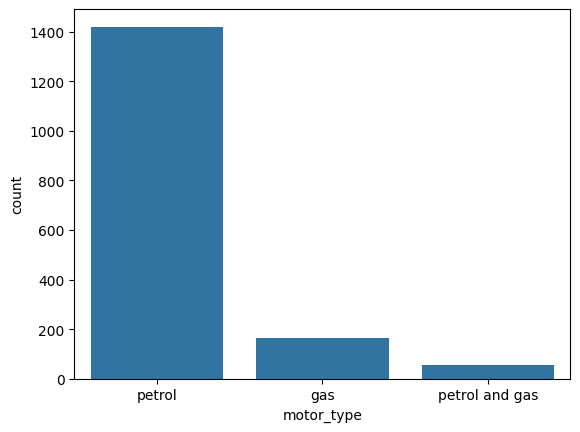

In [11]:
sns.countplot(x=df_train['motor_type'])

<Axes: xlabel='motor_type', ylabel='count'>

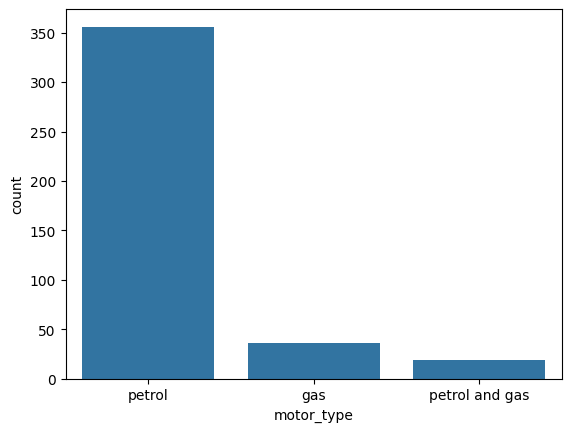

In [12]:
sns.countplot(x=df_test['motor_type'])

<Axes: xlabel='wheel', ylabel='count'>

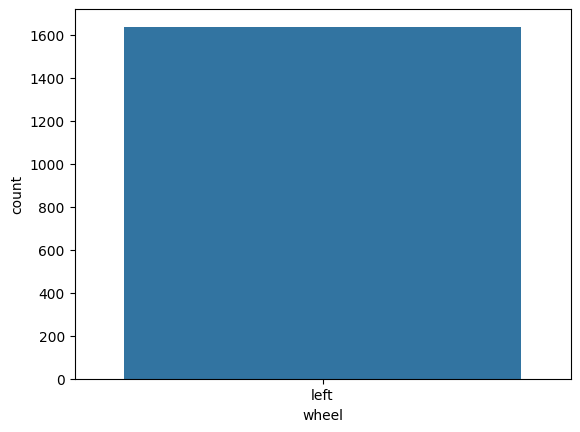

In [13]:
sns.countplot(x=df_train['wheel'])

In [14]:
# df_test = df_test[df_test['wheel'] != 'right'] 
df_test['wheel'] = df_test['wheel'].replace(to_replace='right', value='left')

<Axes: xlabel='wheel', ylabel='count'>

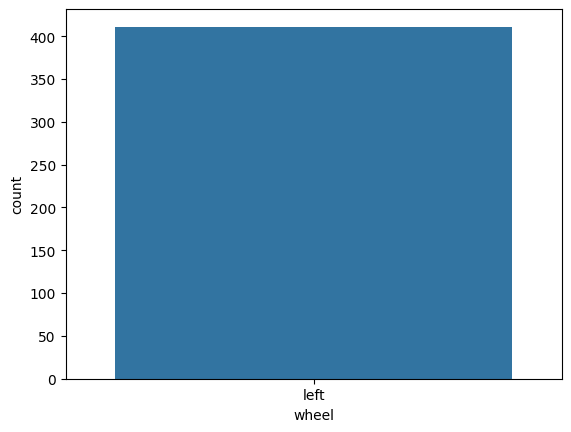

In [15]:
sns.countplot(x=df_test['wheel'])

In [16]:
len(df_train['color'].unique()) - len(df_test['color'].unique())

3

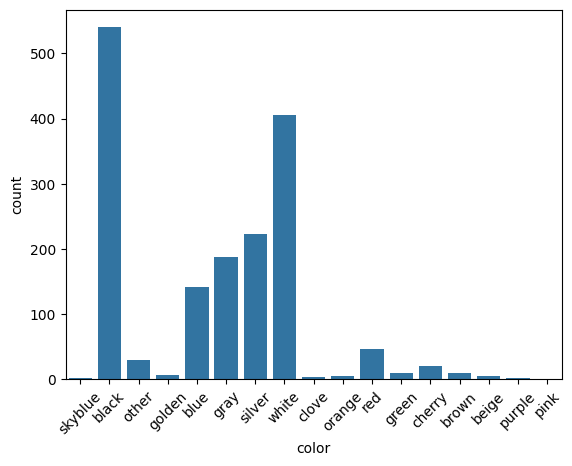

In [17]:
sns.countplot(x=df_train['color'])
plt.xticks(rotation = 45);

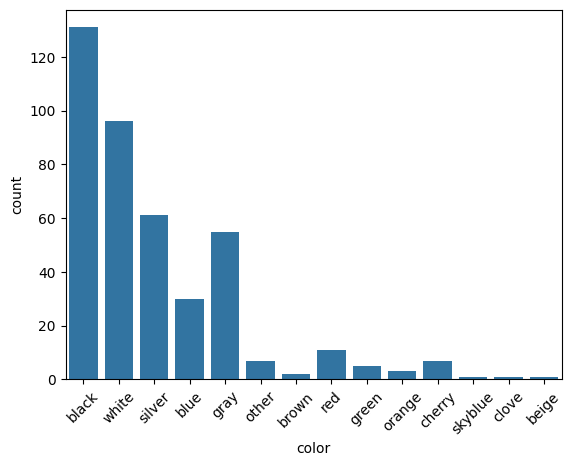

In [18]:
sns.countplot(x=df_test['color'])
plt.xticks(rotation = 45);

In [19]:
df_train = df_train[~df_train['color'].isin(['golden', 'purple', 'pink'])]

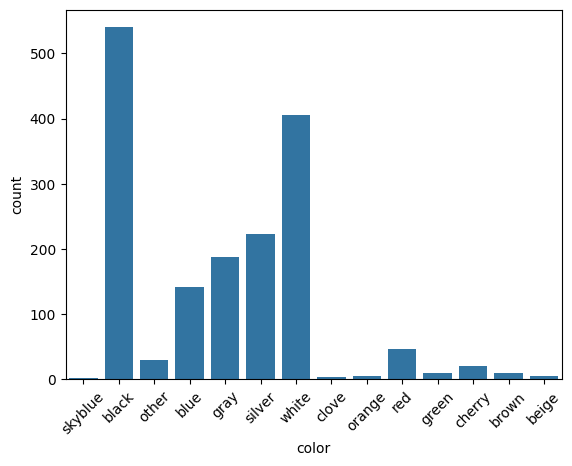

In [20]:
sns.countplot(x=df_train['color'])
plt.xticks(rotation = 45);

In [21]:
df_train

,model,year,motor_type,running,wheel,color,type,status,motor_volume,price
0,toyota,2022,petrol,3000.0,left,skyblue,sedan,excellent,2.0,24500
1,mercedes-benz,2014,petrol,132000.0,left,black,sedan,excellent,2.0,25500
2,kia,2018,petrol,152000.0,left,other,sedan,excellent,2.0,11700
4,mercedes-benz,2017,petrol,130000.0,left,black,sedan,good,2.0,26000
5,mercedes-benz,2001,petrol,286293.0,left,blue,sedan,good,1.8,6000
...,...,...,...,...,...,...,...,...,...,...
1637,hyundai,2017,petrol,192000.0,left,white,sedan,good,2.0,12400
1638,toyota,2014,petrol,170000.0,left,black,sedan,good,2.0,16500
1639,nissan,2018,petrol,110240.0,left,blue,suv,good,2.0,19500
1640,nissan,2019,petrol,49600.0,left,black,suv,excellent,2.0,19500


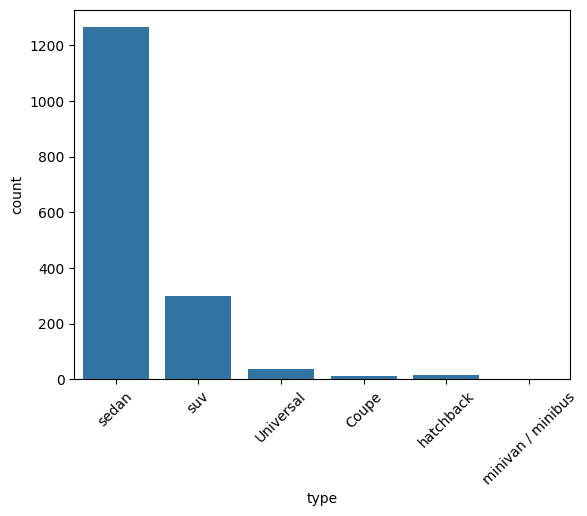

In [22]:
sns.countplot(x=df_train['type'])
plt.xticks(rotation = 45);

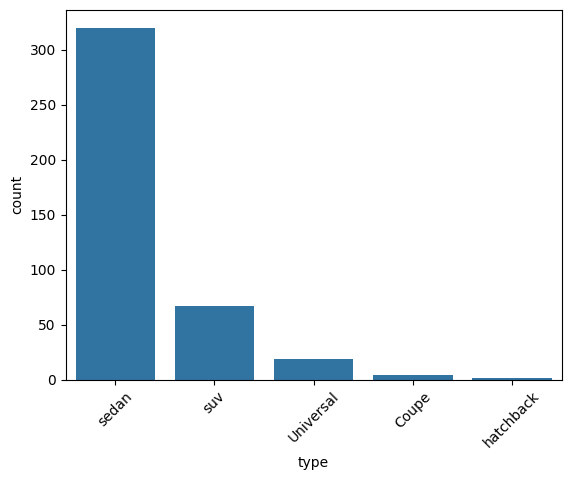

In [23]:
sns.countplot(x=df_test['type'])
plt.xticks(rotation = 45);

In [24]:
df_train = df_train[df_train['type'] != 'minivan / minibus'] 

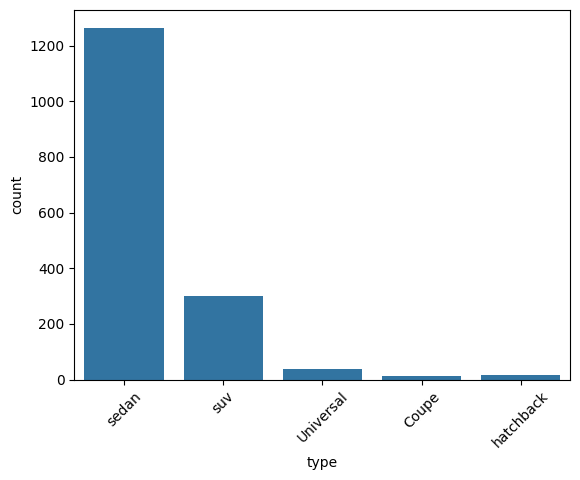

In [25]:
sns.countplot(x=df_train['type'])
plt.xticks(rotation = 45);

<Axes: xlabel='status', ylabel='count'>

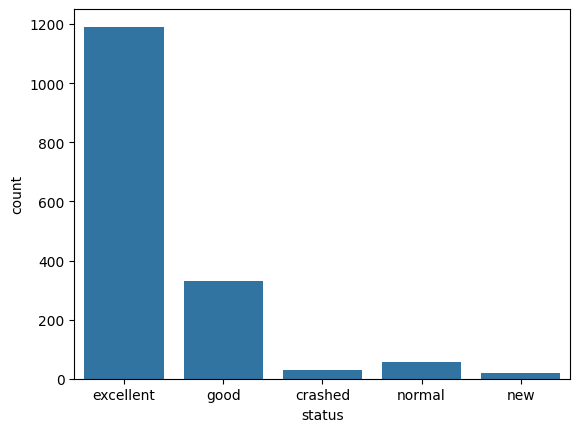

In [26]:
sns.countplot(x=df_train['status'])

<Axes: xlabel='status', ylabel='count'>

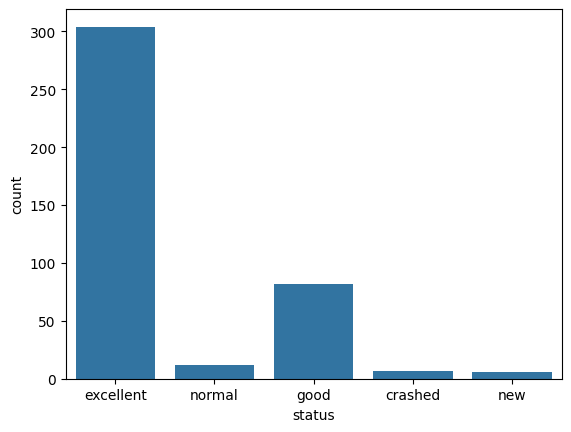

In [27]:
sns.countplot(x=df_test['status'])


In [28]:
X = df_train.drop('price', axis=1)
y = df_train['price']


In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
for i in X.columns:
    label = LabelEncoder()
    if X[i].dtype == object:
        X[i] = label.fit_transform(X[i])
        df_test[i] = label.transform(df_test[i])

In [31]:
X

,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,4,2022,1,3000.0,0,12,3,1,2.0
1,2,2014,1,132000.0,0,1,3,1,2.0
2,1,2018,1,152000.0,0,9,3,1,2.0
4,2,2017,1,130000.0,0,1,3,2,2.0
5,2,2001,1,286293.0,0,2,3,2,1.8
...,...,...,...,...,...,...,...,...,...
1637,0,2017,1,192000.0,0,13,3,2,2.0
1638,4,2014,1,170000.0,0,1,3,2,2.0
1639,3,2018,1,110240.0,0,2,4,2,2.0
1640,3,2019,1,49600.0,0,1,4,1,2.0


In [32]:
df_test

,model,year,motor_type,running,wheel,color,type,status,motor_volume
0,1,2020,1,24000.0,0,1,3,1,2.0
1,3,2017,1,136000.0,0,13,4,1,2.0
2,0,2021,1,48000.0,0,13,3,1,2.0
3,1,2018,1,84800.0,0,11,3,1,2.0
4,2,2003,1,230000.0,0,1,1,4,1.8
...,...,...,...,...,...,...,...,...,...
406,3,2021,1,33400.0,0,1,4,1,2.0
407,0,2017,1,96000.0,0,9,3,1,2.0
408,2,2012,1,218000.0,0,13,3,2,2.0
409,1,2020,1,64000.0,0,10,3,2,2.0


In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
from sklearn.svm import SVR 

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, classification_report 

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
scaler = StandardScaler()

In [43]:
liner = LinearRegression()
poly = PolynomialFeatures(degree=2)
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()
svr = SVR()

In [44]:
#X = poly.fit_transform(X)
#PolynomialFeatures is so large allocate 15.5 GiB

In [45]:
model = [liner, rfr, abr, gbr, svr]
name = ['LinearRegression', 'RandomForestRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor','SVR']

In [46]:
sub = pd.read_csv('sample_submission.csv')

In [47]:
sub

,Id,price
0,0,38
1,1,20549
2,2,3927
3,3,5572
4,4,28598
...,...,...
406,406,2514
407,407,20307
408,408,27274
409,409,14422


In [48]:
MSE = []
r2= []
MAE = []
for mod, nam in zip(model, name):
    mod.fit(X, y)
    y_pred = mod.predict(df_test)
    mse = mean_squared_error(sub['price'], y_pred)
    r2_value = r2_score(sub['price'], y_pred)
    mae = mean_absolute_error(sub['price'], y_pred)
    MSE.append(mse)
    r2.append(r2_value)
    MAE.append(mae)
    
    print(f'{nam}:')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R-squared (R2): {r2_value}')
    print(f'Mean Absolute Error (MAE): {mae}')
    print('')

LinearRegression:
Mean Squared Error (MSE): 96527473.75397007
R-squared (R2): -0.3157448179100344
Mean Absolute Error (MAE): 8216.410463180673

RandomForestRegressor:
Mean Squared Error (MSE): 118418991.63269237
R-squared (R2): -0.6141432954101156
Mean Absolute Error (MAE): 8615.82974800139

AdaBoostRegressor:
Mean Squared Error (MSE): 121125954.56859279
R-squared (R2): -0.6510413133180899
Mean Absolute Error (MAE): 8521.518519093872

GradientBoostingRegressor:
Mean Squared Error (MSE): 111527457.6726425
R-squared (R2): -0.520206307910599
Mean Absolute Error (MAE): 8541.33662963712

SVR:
Mean Squared Error (MSE): 73828118.6916708
R-squared (R2): -0.006334888989235399
Mean Absolute Error (MAE): 7425.006221455454



### MSE barplot

<Axes: >

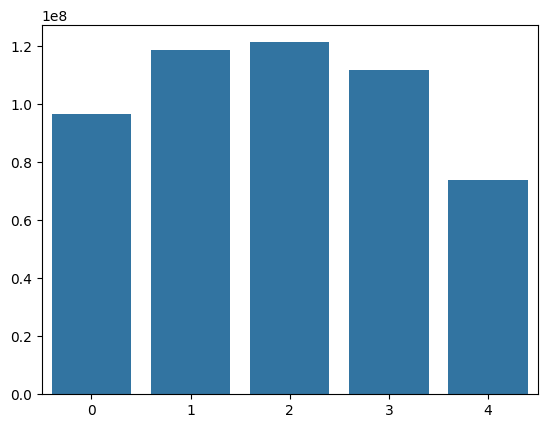

In [49]:
sns.barplot(MSE)

### r2_score barplot

<Axes: >

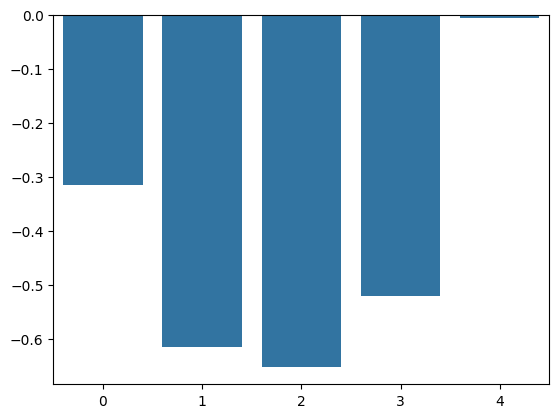

In [50]:
sns.barplot(r2)

### MAE barplot

<Axes: >

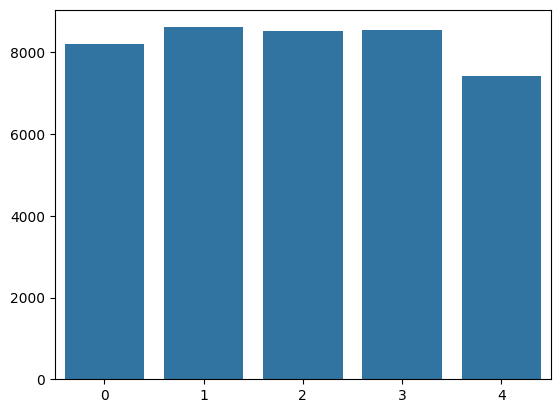

In [51]:
sns.barplot(MAE)

In [52]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [116]:
grid_search = GridSearchCV(gbr, param_grid, cv=5, verbose=2) 

In [117]:
grid_search.fit(X, y)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_est

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             verbose=2)

In [118]:
y_pred= gbr.predict(df_test)

In [119]:
y_pred.shape

(411,)

In [120]:
sub['price'] = y_pred

In [121]:
sub

,Id,price
0,0,17354.589438
1,1,17066.427835
2,2,22918.871768
3,3,14249.842149
4,4,7077.390520
...,...,...
406,406,26701.321098
407,407,13791.816529
408,408,15505.865134
409,409,16285.830181


In [122]:
sub.to_csv('sub.csv', index_label= False, index= False)